# Heart Dataset

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [525]:
df = pd.read_csv("heart.csv")

## Helper Function

In [526]:
def data_type_analysis(df, ignore_complete_columns = False):
    results = []
    # Analyze each column with missing values
    for column in df.columns:
        col_data = df[column]
        nan_count = col_data.isna().sum()
        prop_missing = nan_count / len(df)
        # Only process columns with missing values
        if nan_count > 0 or not ignore_complete_columns:
            unique_values = col_data.nunique(dropna=True)
            non_na_data = col_data.dropna()
            
            if pd.api.types.is_integer_dtype(non_na_data):
                col_type = "Integer"
            elif pd.api.types.is_float_dtype(non_na_data):
                # Check if all values are whole numbers
                if (non_na_data % 1 == 0).all():
                    col_type = "Integer"
                else:
                    col_type = "Float"
            elif pd.api.types.is_string_dtype(non_na_data):
                col_type = "String"
            else:
                col_type = "Other"
            
            # Append results to the list
            results.append({
                "Column": column,
                "Type": col_type,
                "Unique Values": unique_values,
                "NaN Count": nan_count,
                "Proportion Missing": prop_missing,
            })
    # Convert the list of results into a DataFrame
    analysis_df = pd.DataFrame(results)
    return analysis_df

## Cleaning

Sumarize Data

In [527]:
temp = data_type_analysis(df)
print("Entier Summary")
print(temp)
temp1 = temp[(temp['Type']=="String")]
print("String Data")
print(temp1)

Entier Summary
            Column     Type  Unique Values  NaN Count  Proportion Missing
0              Age  Integer             50          0                 0.0
1              Sex   String              2          0                 0.0
2    ChestPainType   String              4          0                 0.0
3        RestingBP  Integer             67          0                 0.0
4      Cholesterol  Integer            222          0                 0.0
5        FastingBS  Integer              2          0                 0.0
6       RestingECG   String              3          0                 0.0
7            MaxHR  Integer            119          0                 0.0
8   ExerciseAngina   String              2          0                 0.0
9          Oldpeak    Float             53          0                 0.0
10        ST_Slope   String              3          0                 0.0
11    HeartDisease  Integer              2          0                 0.0
String Data
           

In [528]:
binary_columns = list(temp1[temp1["Unique Values"] == 2]["Column"])
mulit_cat_columns = list(temp1[temp1["Unique Values"] > 2]["Column"])
# print(binary_columns)
# print(mulit_cat_columns)
nominal_columns = mulit_cat_columns[:-1]
ordinal_column = mulit_cat_columns[-1]

print("nominal columns:")
print(nominal_columns)
print("ordinal column:")
print(ordinal_column)

# df[ordinal_column].unique()

nominal columns:
['ChestPainType', 'RestingECG']
ordinal column:
ST_Slope


### Manage Multicategorical Varaiables
Turn nominal columns to one hot encoding, Turn ordinal column to integer values

In [529]:
# Convert each binary column to 0 and 1
for col in binary_columns:
    unique_values = df[col].unique()
    df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})

# Convert nominal columns to be one hot encoding
df = pd.get_dummies(df, columns=nominal_columns,dtype=int)

# Convert Ordinal Column To Integer
unique_values = df[ordinal_column].unique()
value_to_binary = {val: idx for idx, val in enumerate(unique_values)}  # Generalized dictionary
df[ordinal_column] = df[ordinal_column].map(value_to_binary)

# drop dummy variable
df = df.drop("ChestPainType_ASY",axis=1)

df = df.drop("RestingECG_Normal",axis=1)

Summary

In [530]:
summary = data_type_analysis(df)
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,67,0,0.0
3,Cholesterol,Integer,222,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


### Managing Choresterol Missing Values

In [531]:
zero_chol = df[df["Cholesterol"] == 0]
total = len(zero_chol["HeartDisease"])
temp = sum(zero_chol["HeartDisease"])
print(temp/total)

0.8837209302325582


In [532]:
conti_columns = list(summary[summary["Unique Values"]>3]["Column"])
conti_columns

for col in conti_columns:
    print(col + "Num Zeros:", sum(df[col] == 0))

AgeNum Zeros: 0
RestingBPNum Zeros: 1
CholesterolNum Zeros: 172
MaxHRNum Zeros: 0
OldpeakNum Zeros: 368


In [533]:
conti_columns

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [534]:
import pandas as pd

# Create a new column indicating missingness (where value is zero)
df['MissingCholesterolNum'] = (df['Cholesterol'] == 0).astype(int)
print(df)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    0        140          289          0    172               0   
1     49    1        160          180          0    156               0   
2     37    0        130          283          0     98               0   
3     48    1        138          214          0    108               1   
4     54    0        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    0        110          264          0    132               0   
914   68    0        144          193          1    141               0   
915   57    0        130          131          0    115               1   
916   57    1        130          236          0    174               0   
917   38    0        138          175          0    173               0   

     Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0        0.0         

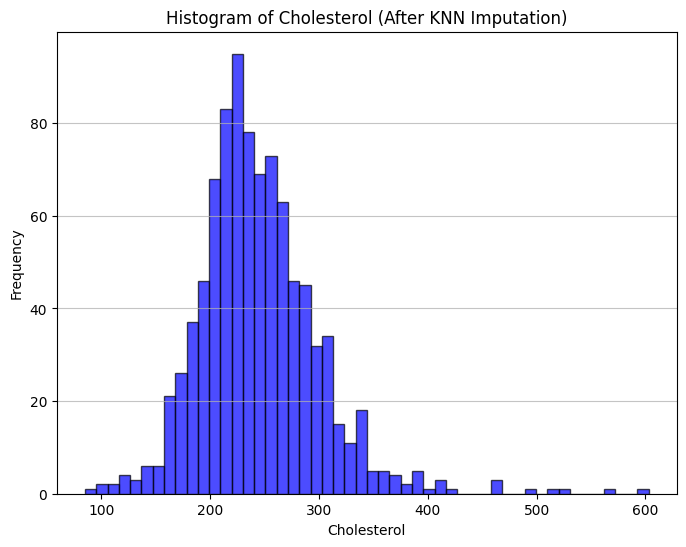

In [535]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
# Step 1: Standardize numerical features
numerical_features = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
# numerical_features = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

df_scaled = df.copy()

df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 2: Replace zero values in Cholesterol with NaN
df_scaled['Cholesterol'] = df_scaled['Cholesterol'].replace(0, float('nan'))

# Step 3: Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)  # Using 3 neighbors for imputation
data_imputed = knn_imputer.fit_transform(df_scaled)

# Step 4: Restore Cholesterol to the dataset
data_imputed = pd.DataFrame(data_imputed, columns=df.columns)
df['Cholesterol'] = data_imputed['Cholesterol']

# Step 5: Undo standardization for interpretability
# df[numerical_features] = scaler.inverse_transform(df[numerical_features])

# Plot the histogram for the imputed Cholesterol column
plt.figure(figsize=(8, 6))
plt.hist(df['Cholesterol'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Cholesterol (After KNN Imputation)')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

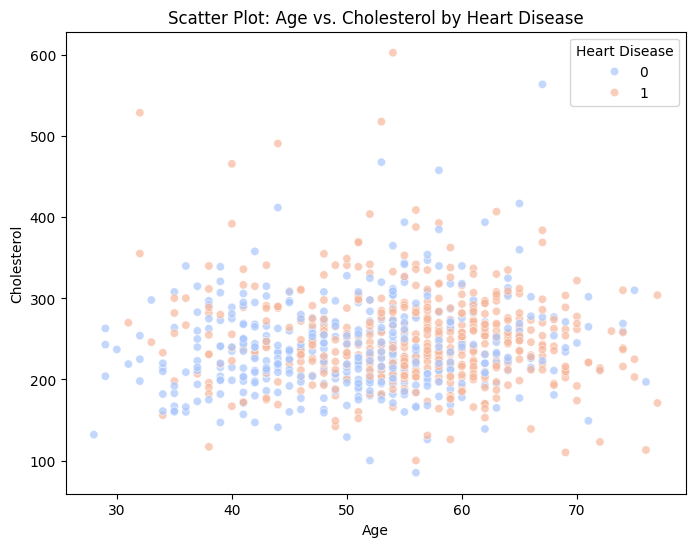

In [536]:

# Scatter plot of Age vs. Cholesterol colored by HeartDisease
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Age vs. Cholesterol by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease')
plt.show()

In [537]:
conti_columns = list(summary[summary["Unique Values"]>3]["Column"])
conti_columns

for col in conti_columns:
    print(col + " Num Zeros:", sum(df[col] == 0))

Age Num Zeros: 0
RestingBP Num Zeros: 1
Cholesterol Num Zeros: 0
MaxHR Num Zeros: 0
Oldpeak Num Zeros: 368


In [538]:
df = df[df['RestingBP'] != 0]

for col in conti_columns:
    print(col + "Num Zeros:", sum(df[col] == 0))

AgeNum Zeros: 0
RestingBPNum Zeros: 0
CholesterolNum Zeros: 0
MaxHRNum Zeros: 0
OldpeakNum Zeros: 368


### Save File

In [539]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,MissingCholesterolNum
0,40,0,140,289.0,0,172,0,0.0,0,0,1,0,0,0,0,0
1,49,1,160,180.0,0,156,0,1.0,1,1,0,1,0,0,0,0
2,37,0,130,283.0,0,98,0,0.0,0,0,1,0,0,0,1,0
3,48,1,138,214.0,0,108,1,1.5,1,1,0,0,0,0,0,0
4,54,0,150,195.0,0,122,0,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264.0,0,132,0,1.2,1,1,0,0,1,0,0,0
914,68,0,144,193.0,1,141,0,3.4,1,1,0,0,0,0,0,0
915,57,0,130,131.0,0,115,1,1.2,1,1,0,0,0,0,0,0
916,57,1,130,236.0,0,174,0,0.0,1,1,1,0,0,1,0,0


In [540]:
df.to_csv("clean_heart.csv",index=False)

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    917 non-null    int64  
 1   Sex                    917 non-null    int64  
 2   RestingBP              917 non-null    int64  
 3   Cholesterol            917 non-null    float64
 4   FastingBS              917 non-null    int64  
 5   MaxHR                  917 non-null    int64  
 6   ExerciseAngina         917 non-null    int64  
 7   Oldpeak                917 non-null    float64
 8   ST_Slope               917 non-null    int64  
 9   HeartDisease           917 non-null    int64  
 10  ChestPainType_ATA      917 non-null    int64  
 11  ChestPainType_NAP      917 non-null    int64  
 12  ChestPainType_TA       917 non-null    int64  
 13  RestingECG_LVH         917 non-null    int64  
 14  RestingECG_ST          917 non-null    int64  
 15  MissingChol

In [542]:
summary = data_type_analysis(df)

In [543]:
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,66,0,0.0
3,Cholesterol,Float,303,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


## Temp

In [544]:
# df = df.drop("ChestPainType_ASY",axis=1)

# df = df.drop("RestingECG_Normal",axis=1)
# df = df.drop("ChestPainType_TA",axis=1)

In [545]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
# df = df.drop("ChestPainType_ASY",axis=1)

# df = df.drop("RestingECG_Normal",axis=1)

# Assuming `data` is your dataset and 'HeartDisease' is the target variable
# Separate the independent variables (features) from the target variable
X = df.drop('HeartDisease', axis=1)

# Standardize the numerical features (optional but recommended for stability)
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Replace with your numerical columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Add a constant for the VIF calculation
X['Constant'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant from the VIF results
vif_data = vif_data[vif_data["Feature"] != "Constant"]

# Print the VIF table
print(vif_data)

                  Feature       VIF
0                     Age  1.400765
1                     Sex  1.109941
2               RestingBP  1.125236
3             Cholesterol  1.047095
4               FastingBS  1.186324
5                   MaxHR  1.535786
6          ExerciseAngina  1.567778
7                 Oldpeak  1.535753
8                ST_Slope  1.630973
9       ChestPainType_ATA  1.495059
10      ChestPainType_NAP  1.266616
11       ChestPainType_TA  1.124778
12         RestingECG_LVH  1.183368
13          RestingECG_ST  1.126695
14  MissingCholesterolNum  1.287069


## Statistical Test

In [546]:
summary = data_type_analysis(df)
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,66,0,0.0
3,Cholesterol,Float,303,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


In [547]:
binary_columns = list(summary[summary["Unique Values"] == 2]["Column"])

for col in binary_columns:
    # print(col)
    print(col)

print(len(binary_columns))


Sex
FastingBS
ExerciseAngina
HeartDisease
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
RestingECG_LVH
RestingECG_ST
MissingCholesterolNum
10


p = proportion of heart disease
p0 =  proportion of label 0 that have heart disease
p1 =  proportion of label 1 that have heart disease

H0: p0 = p1


In [548]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Example function for proportion_df_test (replace with your actual implementation)
def proportion_df_test(col, label, df):
    """
    Perform a proportion test between a binary column and the label.
    Replace this with your implementation.
    """
    contingency_table = pd.crosstab(df[col], df[label])
    stat, p_value = stats.chi2_contingency(contingency_table)[:2]
    return stat, p_value

label = "HeartDisease"
binary_columns = [col for col in binary_columns if col != label]

stats_list = []
p_values = []
reject_h0_list = []
confidence_intervals = []

for col in binary_columns:
    stat, p_value = proportion_df_test(col, label, df)
    n = len(df)  # Assuming `df` is your dataset
    standard_error = np.sqrt(stat / n)  # Approximation for SE
    margin_of_error = 1.96 * standard_error

    # 95% Confidence Interval
    ci_lower = stat - margin_of_error
    ci_upper = stat + margin_of_error

    stats_list.append(stat)
    p_values.append(p_value)
    reject_h0_list.append(p_value < 0.05)
    confidence_intervals.append((ci_lower, ci_upper))

df_proportion_test = pd.DataFrame({
    "Group": binary_columns,
    "stat": stats_list,
    "p_value": p_values,
    "reject_h0": reject_h0_list,
    "95% CI Lower": [ci[0] for ci in confidence_intervals],
    "95% CI Upper": [ci[1] for ci in confidence_intervals],
})

df_proportion_test


,Group,stat,p_value,reject_h0,95% CI Lower,95% CI Upper
0,Sex,83.871151,5.280956e-20,True,83.278393,84.463909
1,FastingBS,64.591342,9.215944e-16,True,64.071156,65.111528
2,ExerciseAngina,223.107207,1.899519e-50,True,222.140425,224.073988
3,ChestPainType_ATA,145.896978,1.367299e-33,True,145.115180,146.678776
4,ChestPainType_NAP,41.472454,1.195436e-10,True,41.055632,41.889277
5,ChestPainType_TA,2.252946,1.333603e-01,False,2.155795,2.350097
6,RestingECG_LVH,0.065591,7.978679e-01,False,0.049014,0.082168
7,RestingECG_ST,9.223969,2.388671e-03,True,9.027393,9.420545
8,MissingCholesterolNum,91.048334,1.402052e-21,True,90.430734,91.665934


In [549]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

def proportion_df_test(group,label,df, alternative="two-sided"):
    group1 = df[df[group] == 1] # True True Fase
    group0 = df[df[group] == 0]

    successes = [sum(group0[label]) , sum(group1[label])]
    n_trials = [len(group0),len(group1)]

    # Perform the two-proportion z-test
    stat, p_value = proportions_ztest(successes, n_trials,alternative=alternative)

    return stat, p_value

def proportion_df_confint(group,label,df, alternative="two-sided"):
    group1 = df[df[group] == 1] # True True Fase
    group0 = df[df[group] == 0]

    successes = [sum(group0[label]) , sum(group1[label])]
    n_trials = [len(group0),len(group1)]

    # Perform the two-proportion z-test
    ci_lower, ci_upper = proportion_confint(successes, n_trials, alpha=0.05, method='normal')

    return ci_lower, ci_upper


In [550]:

label  = "HeartDisease"

binary_columns = [col for col in binary_columns if col != label]

# print(binary_columns)

stats = []
p_values = []
reject_h0 = []
lower_cis = []
upper_cis = []
for col in binary_columns:
    stat, p_value =  proportion_df_test(col,label,df)
    ci_lower, ci_upper =  proportion_df_confint(col,label,df)
    stats.append(stat)
    p_values.append(p_value)
    # lower_cis.append(ci_lower)
    # upper_cis.append(ci_upper)
    lower_cis.append(ci_lower[1] - ci_lower[0])  # Difference in lower CI
    upper_cis.append(ci_upper[1] - ci_upper[0])  # Difference in upper CI
    reject_h0 = p_value < 0.05

df_proportion_test = pd.DataFrame({
    "Group":  binary_columns,
    "stat": stats,
    "p_value": p_values,
    "reject_h0": reject_h0,
    "upper_cis": upper_cis,
    "lower_cis": lower_cis
})

df_proportion_test


,Group,stat,p_value,reject_h0,upper_cis,lower_cis
0,Sex,9.239586,2.474525e-20,True,-0.345481,-0.398815
1,FastingBS,-8.115387,4.842382e-16,True,0.332237,0.297800
2,ExerciseAngina,-15.004436,6.867257e-51,True,0.498091,0.505779
3,ChestPainType_ATA,12.163665,4.853163e-34,True,-0.493248,-0.527682
4,ChestPainType_NAP,6.520042,7.028779e-11,True,-0.228220,-0.288390
5,ChestPainType_TA,1.653120,9.830636e-02,True,-0.014061,-0.234628
6,RestingECG_LVH,-0.338367,7.350868e-01,True,0.048536,-0.021013
7,RestingECG_ST,-3.121063,1.801993e-03,True,0.163292,0.095834
8,MissingCholesterolNum,-9.627188,6.138630e-22,True,0.418155,0.393504


### Checking For independent 

$$
P(A) P(B|A) = P(A,B)
$$

$$
P(A) P(B) = P(A,B)
$$

$$
P(A) = P(A|B)
$$

In [551]:
pa = sum(df["Sex"] == 1)/len(df) # P(Female)

temp = df[(df["ChestPainType_ATA"] == 1)] # the data given heart disease
pab = sum(temp["Sex"] == 1)/len(temp) # P(Female|Heart Disease)

# P(Female) = P(Female|Heart Disease) then they are independent

print(pa)
print(pab)


0.21046892039258452
0.3468208092485549


# Modeling

In [552]:
summary

continuous_cols = list(summary[summary["Unique Values"] > 3]["Column"])
categorical_cols = list(summary[summary["Unique Values"] <= 3]["Column"])
categorical_cols

['Sex',
 'FastingBS',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_ST',
 'MissingCholesterolNum']

### Mutual Information

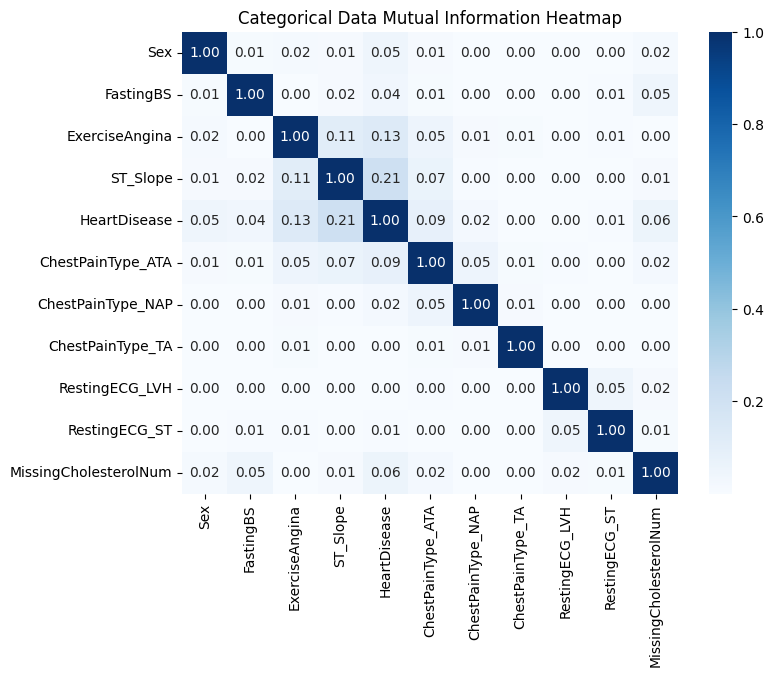

In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Sample DataFrame with categorical data

# Function to calculate mutual information matrix for specified categorical columns
def calculate_categorical_mutual_info(df, columns):
    n = len(columns)
    mi_matrix = np.zeros((n, n))
    
    # Iterate over all pairs of selected columns
    for i in range(n):
        for j in range(n):
            if i == j:
                mi_matrix[i, j] = 1  # Perfect mutual information with itself
            else:
                mi_matrix[i, j] = mutual_info_classif(
                    df[[columns[i]]], df[columns[j]], discrete_features=True
                )[0]
    return mi_matrix

# Calculate mutual information matrix for the selected columns
mi_matrix = calculate_categorical_mutual_info(df, categorical_cols)

# Convert matrix to DataFrame for better labeling
mi_df = pd.DataFrame(mi_matrix, index=categorical_cols, columns=categorical_cols)

# Plot heat map
plt.figure(figsize=(8, 6))
sns.heatmap(mi_df, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Categorical Data Mutual Information Heatmap")
plt.show()


In [554]:
contingency_table = pd.crosstab(df['MissingCholesterolNum'], df['HeartDisease'])

# Display the table
print(contingency_table)

HeartDisease             0    1
MissingCholesterolNum          
0                      390  356
1                       20  151


In [555]:
print(df.columns)


Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_ST', 'MissingCholesterolNum'],
      dtype='object')
